# Project 3
#### This project was completed by ID: 10826685

In this project, the use of the Monte Carlo technique is explored through the simulation of neutron transport and scattering in different material layers. The three materials explored are water, lead and graphite. These are first simulated for a 10cm thickness of the material, using 10,000 neutrons in each simulation attempt.

In [680]:
# Initialisation
import string
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams.update({'font.size': 14})
plt.style.use('default')

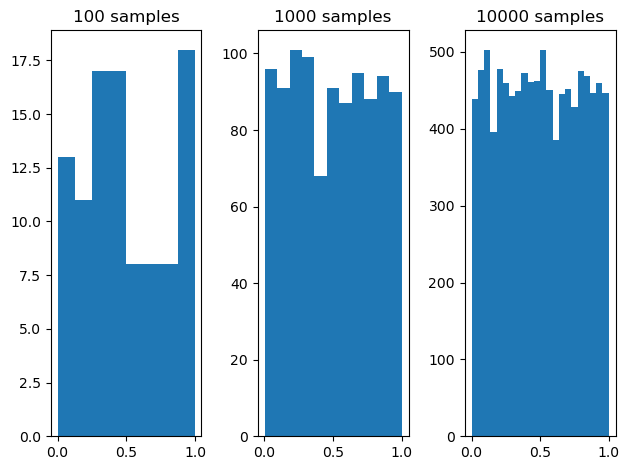

<Figure size 1500x700 with 0 Axes>

In [681]:
fig,(ax1, ax2, ax3) = plt.subplots(1,3)
plt.rcParams["figure.figsize"] = (15,7)

r = np.random.uniform(0,1,[1, 100])
s = np.random.uniform(0, 1, [1, 1000])
t = np.random.uniform(0,1, [1,10000])


#Initialise plot
plt.figure()

ax1.hist(r[0], bins='auto')
ax1.set_title('100 samples')
ax2.hist(s[0], bins = 'auto')
ax2.set_title('1000 samples')
ax3.hist(t[0], bins='auto')
ax3.set_title('10000 samples')

fig.tight_layout()
plt.show()

The histograms above display the generation of tables of random numbers. As the sample number increases, we can see that the indvidual bins height tends to the same across all bins. This displays that the random numbers tend to a uniform distribution using np.random.uniform.

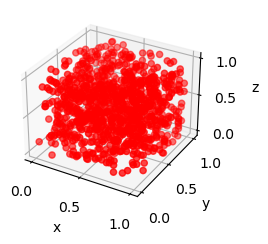

In [682]:

r = np.random.uniform(0, 1, [3, 1000])


#Initialise plot
plt.rcParams["figure.figsize"] = (2,3)

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(r[0, :], r[1, :], r[2, :], color='r')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()


Rotate the plot using the %matplotlib notebook command to make it interactive. Upon rotation, no hyperplanes form from the randomly generated points. There is therefore no spectral issues when using np.random.uniform to generate these points and can be used in future random number generation in the project.

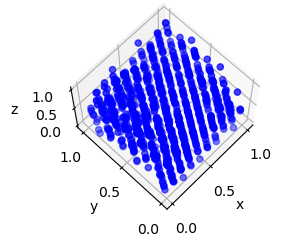

In [683]:
def randssp(p,q):
    '''
    This function uses RANDSSP Multiplicative congruential uniform random number generator to generate random numbers, 
    based on parameters used by IBM's Scientific Subroutine Package. It takes a p x q matrix and generates random 
    numbers in that matrix size.

    Parameters
    ----------
    p : integer
        number of rows in the matrix be generated
    q: integer
        number of columns in the matrix to be generated
  
    Returns
    -------
    list
        the p x q matrix of random numbers.
    '''
    
    
    m = pow(2, 31)
    a = pow(2, 16) + 3
    c = 0
    x = 123456789
    
    try: p
    except NameError:
        p = 1
    try: q
    except NameError:
        q = p
    
    r = np.zeros([p,q])

    for l in range (0, q):
        for k in range (0, p):
            x = np.mod(a*x + c, m)
            r[k, l] = x/m
    
    return r
 



r_randssp = randssp(3, 1000)

#Initialise plot and display coordinates on 3D axis.

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r_randssp[0, :], r_randssp[1, :], r_randssp[2, :], color='b')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=65, azim=-136)

plt.show()



It can clearly be seen here that hyperplanes have formed in the points distributed by the randssp() function. The randssp numbers clearly have correlation between them and suffer from spectral issues. The randssp() function cannot be used to generate random numbers in the future functions of this project.

From here on, the np.random.uniform function will be used to generate random numbers since it doesn't produce hyperplanes. In the next block of code, samples are produced according to an exponential distribution weighted by the mean free path of water to demonstrate that the characterisitc attenuation length of water in the absence of scattering is 45cm.

In [684]:
density_water = 1.0 #g/cm^3
molar_mass_water = 18.0153 #g/mol
absorption_water = 0.6652 *10**(-24) #cm^2 
scattering_water = 103 * 10**(-24) # cm^2
N_A = 6.02* 10 ** 23 #Avogadro's constant


#Calculate the mean free path of water 
inverse_lambda_water = (density_water * N_A * absorption_water)/molar_mass_water


nparticles=10000
niterations=20
rmax=300
nbins=30

def dist_exp(n_particles):
    '''
    This function uses the np.uniform.random function to produce sample positions that follow an exponential 
    distribution of the mean free path of water.

    Parameters
    ----------
    n_particles : int
            number of particles to be sampled for this distribution
    
        

    Returns
    -------
    list
    array of the cumulative distribtution functions for this distribution
        
    '''
    
    v_rand = np.random.uniform(0, 1, n_particles)
    cdf = -inverse_lambda_water*np.log(v_rand)
    return cdf

#create empty arrays to populate
frequency=np.zeros((niterations,nbins))
mean_freq=np.zeros(nbins)
std_freq=np.zeros(nbins)

#Iterate through the different histograms to obtin the frequency and position of the bins

for iteration in range(niterations):
    frequency[iteration,:], rbins = np.histogram(dist_exp(nparticles),bins=nbins,range=(0,1))


rbins=rbins[:-1] #remove last element of the histogram edges 


#Calculate the mean and standard deviation of the bins
for ibin in range(nbins):
    mean_freq[ibin]=np.mean(frequency[:,ibin])
    std_freq[ibin] = np.std(frequency[:,ibin])

# delete empty bins
rbins=np.delete(rbins,np.argwhere(mean_freq==0))
mean_freq =np.delete(mean_freq, np.argwhere(mean_freq==0))
std_freq =np.delete(std_freq, np.argwhere(std_freq==0))

#Calculate the error to use as weighting.
error=std_freq/mean_freq


coeff,covar=np.polyfit(rbins,np.log(mean_freq),1,cov=True,w=1/error)

att_len = -coeff[0]
u_att_len = np.sqrt(covar[0][0])

print(f'The attenuation coefficient was found to be: {att_len:.3f} ± {u_att_len:.3f} cm')
    




The attenuation coefficient was found to be: 44.893 ± 0.131 cm


The block of code below produces isotropic unit vectors distributed over a spherical surface specified by length r.
To remove uneven distribution at poles, the np.arccos is used. From visual inspection of the plot produced below, it is seen that these vectors are evenly distributed across the surface.

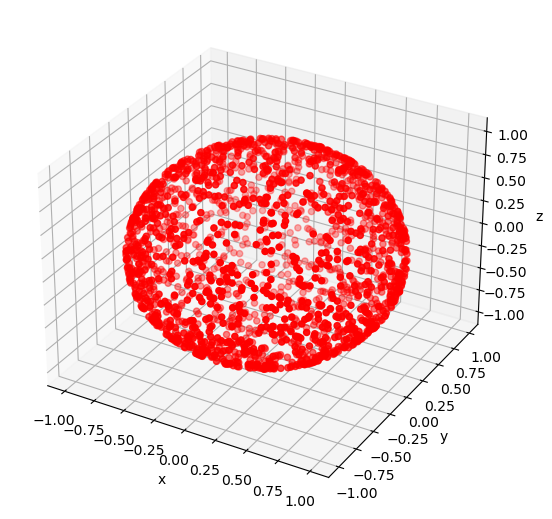

In [685]:
r_1 = 1 #Set the length of the isotropic unit vectors.

def spherical_coords(r, steps):
    '''
    This function distributes a number of coordinate points over a spherical surface of radius r.

    Parameters
    ----------
    r : list
        radius of the spherical surface where the coordinate points are distributed over.
    steps: integer
        number of coordinate points
  
    Returns
    -------
    list
        the respective x, y and z coordinates of the different points.
    '''
    
    theta = np.arccos(1 - 2* np.random.uniform(0, 1, steps))
    phi = np.random.uniform(0, 2*np.pi, steps)

    x = r * np.sin(theta)*np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return x, y, z

#Initialise plot 

plt.rcParams["figure.figsize"] = (12,5)

#obtain 2000 coordinate positions to plot.
x_1, y_1, z_1 = spherical_coords(r_1, 2000)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_1, y_1, z_1, color='r')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()


In the block below, a function r_exp() is defined to produce lengths of the isotropic vectors that are distributed over an exponential distribution. These points are then plotted and displayed to demonstrate this.

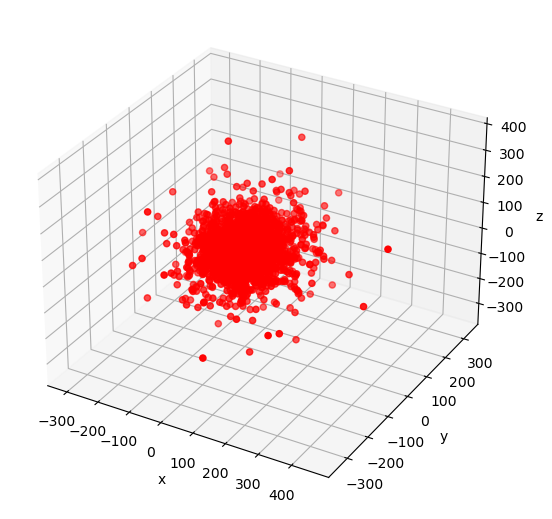

In [686]:
def r_exp(lambda_free, size):
    '''
    This function produces random lengths that are distributed over an exponential distribution with a specified
    mean free path.

    Parameters
    ----------
    lambda_free : float
        the mean free path used in the exponential distribution.
       
    size: integer
        the number of lengths to be produced.
        
  
    Returns
    -------
    list
        the array of the different lengths that are exponentially distributed.
    '''
    
    v_rand = np.random.uniform(0, 1 , size)
    
    return -lambda_free * np.log(v_rand)


#Obtain spherical coordinates for 10000 different points distributed over the exponential distribution.
x_exp, y_exp, z_exp = spherical_coords(r_exp(lambda_water, 10000), 10000)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_exp, y_exp, z_exp, color='r')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

In the block of code below, the material properties of the 3 different materials being considered: water, lead and graphite, are calculated and stored. These are calculated here for future use in the program.


In [687]:
#Determine material properties 

def tot_mean_free_path(sigma_a, sigma_s, density, molar_mass):
    '''
    This function calculates the total mean free path of a material from properties of the material.

    Parameters
    ----------
    sigma_a : float
        the cross section of absorption for the material.
    sigma_s: float
        the cross section of scattering for the material.
    density: float
        the density of the material.
    molar_mass: float
        the molar mass of the material.
  
    Returns
    -------
    float
        the total mean free path of the material
    '''
    free_path = molar_mass/(N_A*density*(sigma_a+sigma_s))
    return free_path

#For lead 
density_lead = 11.35 #g/cm^3
molar_mass_lead = 207.2 #g/mol
absorption_lead = 0.158 * 10**(-24) #cm^2
scattering_lead = 11.22 * 10**(-24) #cm^2

#for graphite
density_graphite = 1.67 #g/cm^3
molar_mass_graphite = 12.011 #g/mol
absorption_graphite = 0.0045 * 10**(-24) # cm^2
scattering_graphite = 4.74 * 10**(-24) # cm^2

total_path_water = tot_mean_free_path(absorption_water, scattering_water, density_water, molar_mass_water)
total_path_lead = tot_mean_free_path(absorption_lead, scattering_lead, density_lead, molar_mass_lead)
total_path_graphite = tot_mean_free_path(absorption_graphite, scattering_graphite, density_graphite, molar_mass_graphite)

print(f'The mean free path of water is: {total_path_water: .2f} cm')
print(f'The mean free path of lead is: {total_path_lead: .2f} cm')
print(f'The mean free path of graphite is: {total_path_graphite: .2f} cm')
    

The mean free path of water is:  0.29 cm
The mean free path of lead is:  2.67 cm
The mean free path of graphite is:  2.52 cm


Below, the random walk of 3 neutrons in a block of 10cm thickness for the 3 different materials is visualised. It can be seen that water, with the smallest mean free path, has the largest amount of scatterings. Both graphite and lead have a similar mean free path and experience much fewer. Although lead has less than graphite as its mean free path is larger. The visualised results are consistent with what is expected from the known data of the material.

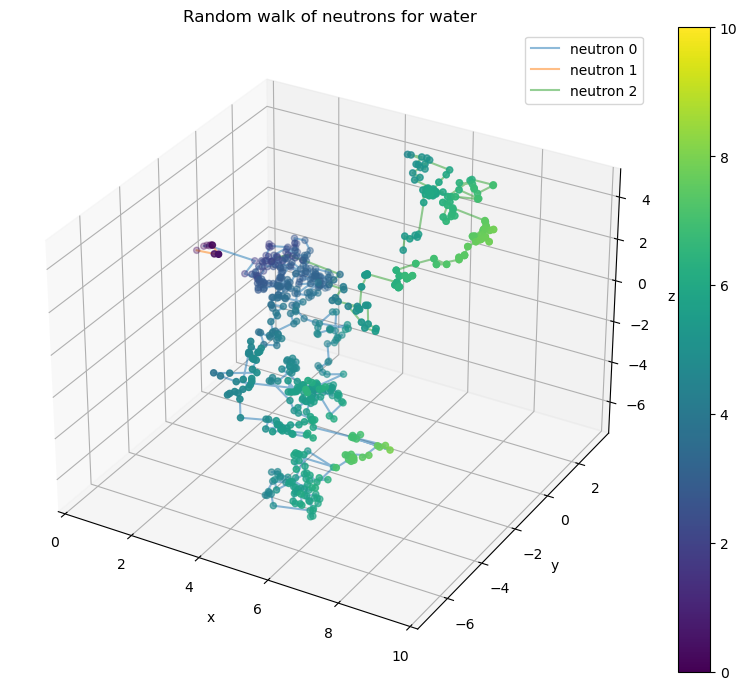

In [688]:
#Define the thickness of the slab 
thickness_slab = 10 #cm


def visualiser(sigma_a, sigma_s, mean_free_path, L, visualise_size):
    '''
    This function visualises the random walk of a number of neutrons through a material of length L. It plots
    the path of the individual neutrons through the material and uses a colourmap to help visualise their position
    along the x-axis. 

    Parameters
    ----------
    sigma_a : float
        the cross section of absorption for the material.
    sigma_s: float
        the cross section of scattering for the material.
    mean_free_path: float
        the mean free path of the material.
    L: integer
        The thickness of the material
    visualise_size: integer
        the number of neutrons to be visualised on the plot
        
  
    Returns
    -------
    float
        the total mean free path of the material
    '''
    
    #Initialise the tallys for each possible situation, these are used to check the function works as desired.
    reflected_tally = 0
    absorbed_tally = 0
    transmitted_tally = 0
    
    #Define the probability of a neutron being absorbed.
    p_a = sigma_a/(sigma_a + sigma_s)
    
    for i in range(visualise_size):
        #Loop through each individual neutron 
        
        #Defining the start position of the neutron, it enters along the positive x-axis and parallel to it.
        x_neutron = - mean_free_path*np.log(np.random.uniform(0,1,1))
        y_neutron = [0]
        z_neutron = [0]
        x_history = []
        y_history = []
        z_history = []
    
    
    
    
    
        while len(x_neutron) > 0: 
            #update the x,y and z position history of the neutron
            x_history.append(x_neutron[0])
            y_history.append(y_neutron[0])
            z_history.append(z_neutron[0])
            
            #Update reflected and transmitted tally if the neutron is found outside the slab
            reflected_tally += np.count_nonzero(x_neutron < 0)
            transmitted_tally += np.count_nonzero(x_neutron > L)
            
            #Determine if neutron has been absorbed and if so update the tally accordingly.
            p_rand = np.random.uniform(0,1 , len(x_neutron))
            absorbed_tally += np.count_nonzero(p_rand[np.argwhere((x_neutron > 0) & (x_neutron < L))] < p_a)
            
        
            x_neutron = np.delete(x_neutron, np.argwhere((x_neutron < 0) | (x_neutron > L) | (p_rand < p_a)))
            
    
        
        
            #Update x for its new value using spherical coordinates following the exponential distribution.
        
            x_neutron += spherical_coords(r_exp(mean_free_path, len(x_neutron)), len(x_neutron))[0]
            y_neutron += spherical_coords(r_exp(mean_free_path, len(y_neutron)), len(y_neutron))[1]
            z_neutron += spherical_coords(r_exp(mean_free_path, len(z_neutron)), len(z_neutron))[2]
            
        #plot the position of the neutron with a colormap along its x-axis to help visualise its x-position.
        ax.scatter(x_history, y_history, z_history, cmap='viridis', c=x_history, vmin = 0 , vmax = 10)
        ax.plot(x_history, y_history, z_history, alpha= 0.5, label = f'neutron {i}')
    
    p = ax.scatter(x_history, y_history, z_history, cmap='viridis', c=x_history, vmin = 0, vmax = 10)
    ax.set_xlim(0, thickness_slab)
    fig.colorbar(p, fraction=0.046, pad=0.04)
    ax.legend()
    plt.show()
    
    
    return 

#Initialise the plot for water
plt.rcParams["figure.figsize"] = (7,8)

fig = plt.figure()
ax = Axes3D(fig)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Random walk of neutrons for water')

visualiser(absorption_water, scattering_water, total_path_water, thickness_slab, 3)         
    

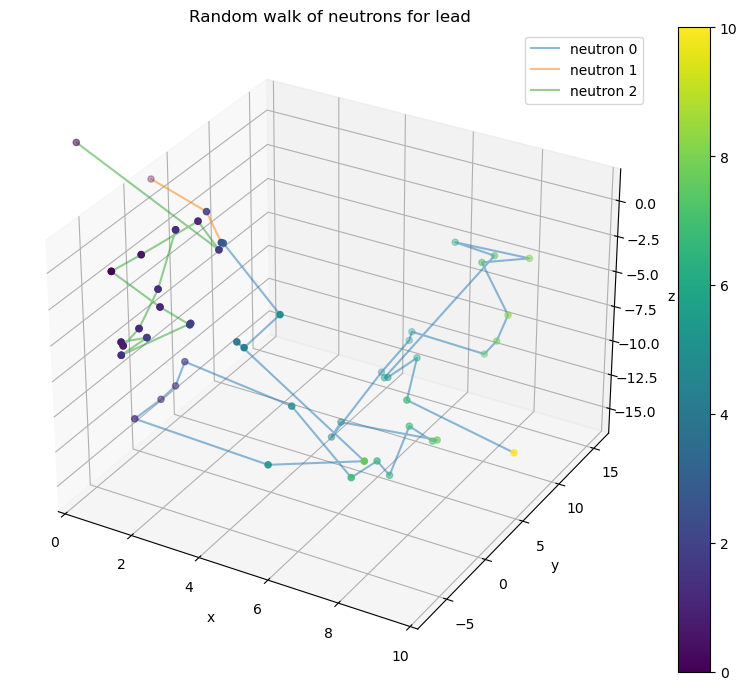

In [689]:
#Initialise plot for lead
plt.rcParams["figure.figsize"] = (7,8)

fig = plt.figure()
ax = Axes3D(fig)
ax.set_title('Random walk of neutrons for lead')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


visualiser(absorption_lead, scattering_lead, total_path_lead, thickness_slab, 3)


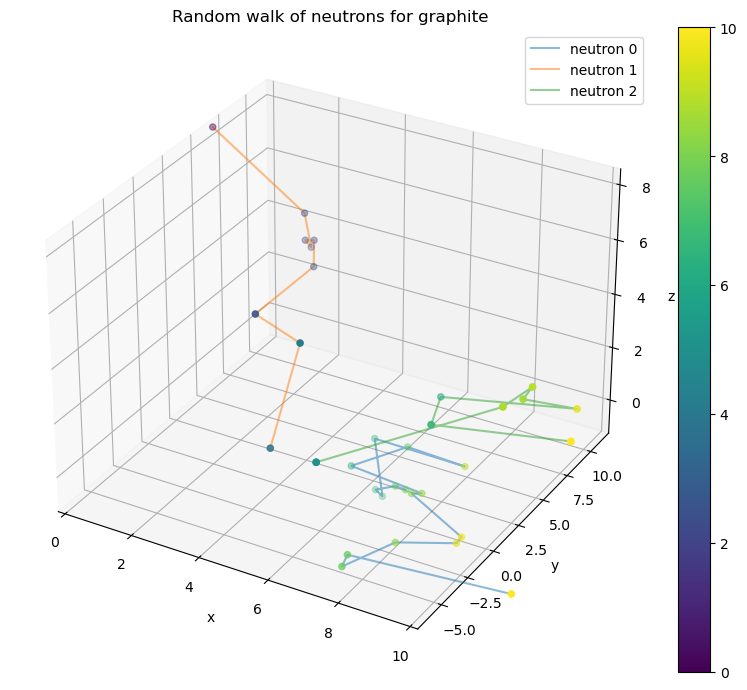

In [690]:
#Intialise plot for graphite
plt.rcParams["figure.figsize"] = (7,8)

fig = plt.figure()
ax = Axes3D(fig)
ax.set_title('Random walk of neutrons for graphite')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


visualiser(absorption_graphite, scattering_graphite, total_path_graphite, thickness_slab, 3)


The number of transmission, absorption and scattering neutrons through each material will now be quantified. 
The program takes a sample of 10,000 neutrons and passes them through a 10cm slab of each seperate material. The neutron takes a step and then the program determines, based on probability, whether it has been absorbed or scattered. If absorbed, the neutron is killed and the absorbed tally increases. If scattered, the process will repeat until either the neutron is reflected out of the slab or transmitted through it. The simulation is then iterated through 10 times to obtain averages for the number of neutrons in each category along with errors. These are then used to calculate the rates of absorption, transmission and reflection.

In [691]:
#Defines the number of neutrons to be passed through the material to be 10,000
n_samp =10000

def simulation(sigma_a, sigma_s, mean_free_path, L, sample_size):
    '''
    This function calculates the average number of neutrons transmitted, reflected and absorbed along with their
    errors. It does this by calculating the average of 10 iterations of a number of neutrons being passed 
    through the material. It then calculates the rates of absorption, transmission and relfection along with 
    their errors.

    Parameters
    ----------
    sigma_a : float
        the cross section of absorption for the material.
    sigma_s: float
        the cross section of scattering for the material.
    mean_free_path: float
        the mean free path of the material
    L: float
        the thickness of the material.
    sample_size: integer
        the number of neutrons simulated in each iteration.
  
    Returns
    -------
    list
        the average number of reflected, transmitted and absorbed neutrons along with their corresponding errors and
        the rates of transmission, reflection and absorption in the material with the corresponding errors also.
        
    '''
    #Define the number of iterations over which the average number of neutrons in each category is calculated.
    n_iter = 10
    
    #Define empty arrays for the average number of neutrons to be populated.
    N_R = np.zeros(n_iter)
    N_T = np.zeros(n_iter)
    N_A = np.zeros(n_iter)
    
    #define probability of absorption
    p_a = sigma_a/(sigma_a + sigma_s)
    
    for i in range(n_iter):
        
        #intialise tallys
        reflected_tally = 0
        absorbed_tally = 0
        transmitted_tally = 0
        
        #initialise intial x position of the neutron.
        x_neutron = - mean_free_path*np.log(np.random.uniform(0,1,sample_size))
   

        while len(x_neutron) > 0: 
            
            #update reflection and transmission tally if neutron is found outside of the material.
            reflected_tally += np.count_nonzero(x_neutron < 0)
            transmitted_tally += np.count_nonzero(x_neutron > L)
            
            #Determine whether the neutron is absorbed and if so, update tally
            p_rand = np.random.uniform(0,1 , len(x_neutron))
            absorbed_tally += np.count_nonzero(p_rand[np.argwhere((x_neutron > 0) & (x_neutron < L))] < p_a)
        
    
            #Remove any of the neutrons that have been absorbed, transmitted or reflected.
            x_neutron = np.delete(x_neutron, np.argwhere((x_neutron < 0) | (x_neutron > L) | (p_rand < p_a)))
        
    
        
        
            #Now we update x for its new value using spherical dist. 
        
            x_neutron += spherical_coords(r_exp(mean_free_path, len(x_neutron)), len(x_neutron))[0]


        N_R[i] = reflected_tally
        N_T[i] = transmitted_tally
        N_A[i] = absorbed_tally
        
    #Calculate the mean and error of for the number of neutrons in each category
        
    N_R_mean = np.mean(N_R)
    N_R_std = np.sqrt(N_R_mean)
    
    N_T_mean = np.mean(N_T)
    N_T_std = np.sqrt(N_T_mean)
    
    N_A_mean = np.mean(N_A)
    N_A_std = np.sqrt(N_A_mean)
    
    #Calculate the rate and error in each category
    
    reflection_rate = N_R_mean/sample_size
    reflection_rate_err = N_R_std/N_R_mean * reflection_rate


    transmission_rate = N_T_mean/sample_size
    transmission_rate_err = N_T_std/N_T_mean * transmission_rate

   

    absorption_rate = N_A_mean/sample_size
    absorption_rate_err = N_A_std/N_A_mean * absorption_rate
   
    
    return  N_R_mean, N_R_std, N_T_mean, N_T_std, N_A_mean, N_A_std, reflection_rate, reflection_rate_err, transmission_rate, transmission_rate_err, absorption_rate, absorption_rate_err






The output of the above function is then displayed for each of the materials below

In [692]:
def output(thickness, n_sample, N_R, std_N_R, N_A, std_N_A, N_T, std_N_T, R_R, err_R_R, T_R, err_T_R, A_R, err_A_R, element):
    '''
    This function outputs key information about each material, giving the thickness of the material, the number
    of neutrons used, the average number of neutrons absorbed, transmitted and relfected along with their errors, 
    and the rates of each category with their corresponding errors.

    Parameters
    ----------
    thickness: float
        the thickness of the material.
    n_sample: integer
        the number of neutrons passed into the material.
    N_R: integer
        the average number of reflected neutrons.
    std_N_R: float
        the error in the average number of reflected neutrons.
    N_A: integer
        the average number of absorbed neutrons.
    std_N_A: float
        the error in the average number of absorbed neutrons.
     N_T: integer
        the average number of transmitted neutrons.
    std_N_T: float
        the error in the average number of transmitted neutrons.
    R_R: float
        the rate of reflected neutrons
    err_R_R: float
        the error in the rate of reflected neutrons.
    T_R: float
        the rate of transmitted neutrons
    err_T_R: float
        the error in the rate of transmitted neutrons.
    A_R: float
        the rate of absorbed neutrons
    err_A_R: float
        the error in the rate of absorbed neutrons.
    element: string
        the name of the material used.
    

    Returns
    -------
  
    '''
    print('-------------------------------------------------\n'
          f'Transmission through a fixed thickness of {element} \n'
          '-------------------------------------------------\n'
        f'Thickness = {thickness}cm \n'
        f'Total neutrons = {n_sample} \n'
        f'Neutrons reflected = {N_R: .1f} ± {std_N_R: .1f} \n'
        f'Neutrons absorbed = {N_A: .1f} ± {std_N_A: .1f} \n'
        f'Neutrons transmitted = {N_T: .1f} ± {std_N_T: .1f} \n'
        f'Percent reflected = {R_R *100: .1f} ± {err_R_R * 100: .1f} \n'
        f'Percent transmitted = {T_R* 100: .1f} ± {err_T_R * 100: .1f} \n'
        f'Percent absorbed = {A_R * 100: .1f} ± {err_A_R * 100: .1f} \n')

#Output results for water
N_R_w, std_N_R_w,  N_T_w, std_N_T_w, N_A_w, std_N_A_w, R_R_w, err_R_R_w, T_R_w, err_T_R_w, A_R_w, err_A_R_w = simulation(absorption_water, scattering_water, total_path_water, thickness_slab, n_samp)

output(thickness_slab, n_samp, N_R_w, std_N_R_w, N_A_w, std_N_A_w, N_T_w, std_N_T_w, R_R_w, err_R_R_w, T_R_w, 
       err_T_R_w, A_R_w, err_A_R_w, 'water')


-------------------------------------------------
Transmission through a fixed thickness of water 
-------------------------------------------------
Thickness = 10cm 
Total neutrons = 10000 
Neutrons reflected =  7962.7 ±  89.2 
Neutrons absorbed =  2003.4 ±  44.8 
Neutrons transmitted =  33.9 ±  5.8 
Percent reflected =  79.6 ±  0.9 
Percent transmitted =  0.3 ±  0.1 
Percent absorbed =  20.0 ±  0.4 



In [693]:
#Output results for lead

N_R_l, std_N_R_l,  N_T_l, std_N_T_l, N_A_l, std_N_A_l,R_R_l, err_R_R_l, T_R_l, err_T_R_l, A_R_l, err_A_R_l = simulation(absorption_lead, scattering_lead,
                                                                        total_path_lead, thickness_slab, n_samp)

output(thickness_slab, n_samp, N_R_l, std_N_R_l, N_A_l, std_N_A_l, N_T_l, std_N_T_l, R_R_l, err_R_R_l, T_R_l, 
       err_T_R_l, A_R_l, err_A_R_l, 'lead')


-------------------------------------------------
Transmission through a fixed thickness of lead 
-------------------------------------------------
Thickness = 10cm 
Total neutrons = 10000 
Neutrons reflected =  6159.0 ±  78.5 
Neutrons absorbed =  1014.8 ±  31.9 
Neutrons transmitted =  2826.2 ±  53.2 
Percent reflected =  61.6 ±  0.8 
Percent transmitted =  28.3 ±  0.5 
Percent absorbed =  10.1 ±  0.3 



In [694]:
#Output results for graphite
N_R_g, std_N_R_g,  N_T_g, std_N_T_g, N_A_g, std_N_A_g, R_R_g, err_R_R_g, T_R_g, err_T_R_g, A_R_g, err_A_R_g  = simulation(absorption_graphite, scattering_graphite,
                                                                        total_path_graphite, thickness_slab, n_samp)

output(thickness_slab, n_samp, N_R_g, std_N_R_g, N_A_g, std_N_A_g, N_T_g, std_N_T_g, R_R_g, err_R_R_g, T_R_g, 
       err_T_R_g, A_R_g, err_A_R_g, 'graphite')

-------------------------------------------------
Transmission through a fixed thickness of graphite 
-------------------------------------------------
Thickness = 10cm 
Total neutrons = 10000 
Neutrons reflected =  6848.1 ±  82.8 
Neutrons absorbed =  82.4 ±  9.1 
Neutrons transmitted =  3069.5 ±  55.4 
Percent reflected =  68.5 ±  0.8 
Percent transmitted =  30.7 ±  0.6 
Percent absorbed =  0.8 ±  0.1 



Water has the highest number of absorbed neutrons with graphite having the lowest. Graphite has the lowest probability of absorption, so this is expected. Water, on the other hand, has a lower probability of absorption than lead. However, the mean free path of water is much less than that of lead, so neutrons passing through water experience more collisions than those in lead, leading to a higher number of absorbed neutrons. The mean free path of lead and graphite is very similar, so graphite has a similar transmission rate to lead. Since water has a much lower mean free path, its transmission rate is much lower than the other two, and instead has more neutrons reflected due to the high collision rate, meaning more scattering occurs. 

This is further supported by the plots of the random walks for each of the different materials, graphite and lead have a very similar number of collisions shown, whereas it can be seen that water has much more. 

The code below determines the rates of transmission, absorption and reflection for different thicknesses of the material, increasing from 1cm to 20cm in steps of 1cm. 

In [695]:
#Set the different thicknesses of the material
slab_thickness_arr = np.linspace(1, 20, 20)

def thickness_variations(sigma_a, sigma_s, mean_free_path, thickness, n_sample):
    '''
    This function calculates the rates of absorption, reflection and transmission of a material along with the 
    corresponding errors for different thicknesses of the material. It also calculates the number of transmissions
    along with its errror.

    Parameters
    ----------
    sigma_a : float
        the cross section of absorption for the material.
    sigma_s: float
        the cross section of scattering for the material.
    mean_free_path: float
        the mean free path of the material
    thickness: list
        the array of the different thicknesses of the material.
    n_sample: integer
        the number of neutrons passed through the material
  
    Returns
    -------
    list
        arrays of the rates of transmission, reflection and absorption in the material with their
        corresponding errors. As well as an array of the number of transmissions with its errrors.
        
    '''
    
    
    #Define the empty arrays  used to store the values for the corresponding different thickness.
    
    N_T_var = np.zeros(len(thickness))
    std_N_T_var = np.zeros(len(thickness))
    
    R_R_var = np.zeros(len(thickness))
    err_R_R_var = np.zeros(len(thickness))
    
    T_R_var = np.zeros(len(thickness))
    err_T_R_var = np.zeros(len(thickness))
    
    A_R_var = np.zeros(len(thickness))
    err_A_R_var = np.zeros(len(thickness))
    
    #Loop through each thickness and store results in corresponding array.
    for i in range(len(thickness)):
        _, _,  N_T_var[i], std_N_T_var[i], _, _,R_R_var[i], err_R_R_var[i], T_R_var[i], err_T_R_var[i], A_R_var[i], err_A_R_var[i] = simulation(sigma_a, sigma_s, 
                                                                                                         mean_free_path, 
                                                                                                              thickness[i],
                                                                                                              n_sample)
        
    
    return R_R_var, err_R_R_var, T_R_var, err_T_R_var, A_R_var, err_A_R_var, N_T_var, std_N_T_var

#Calculate the results for each material
R_R_w_t, err_R_R_w_t, T_R_w_t, err_T_R_w_t, A_R_w_t, err_A_R_w_t, N_T_w_t, std_N_T_w_t = thickness_variations(absorption_water, scattering_water,
                                                                                        total_path_water, slab_thickness_arr,
                                                                                       n_samp)
R_R_l_t, err_R_R_l_t, T_R_l_t, err_T_R_l_t, A_R_l_t, err_A_R_l_t, N_T_l_t, std_N_T_l_t = thickness_variations(absorption_lead, scattering_lead,
                                                                                        total_path_lead, slab_thickness_arr,
                                                                                      n_samp)
R_R_g_t, err_R_R_g_t, T_R_g_t, err_T_R_g_t, A_R_g_t, err_A_R_g_t, N_T_g_t, std_N_T_g_t = thickness_variations(absorption_graphite, scattering_graphite,
                                                                                        total_path_graphite, slab_thickness_arr,
                                                                                       n_samp)


Plots of transmission rate, absorption rate and reflection rate against slab thickness are shown below.

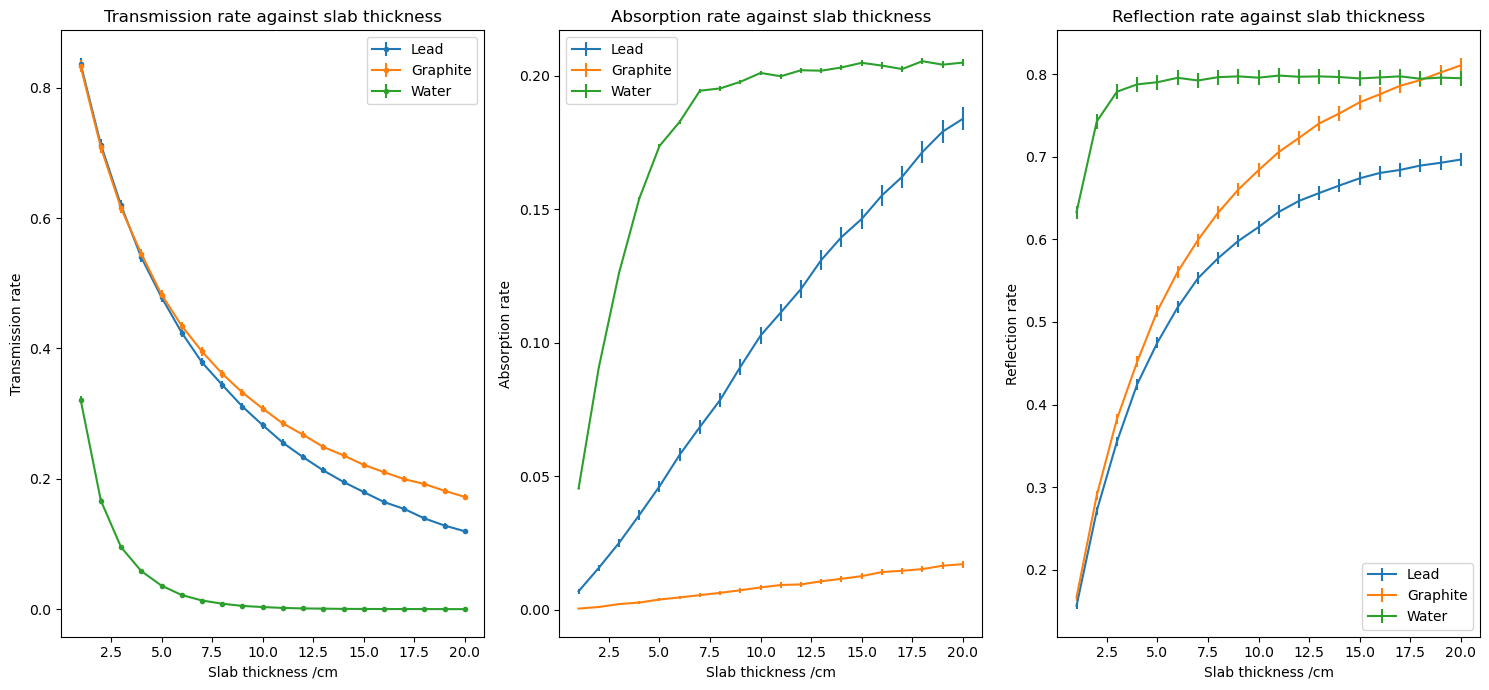

In [696]:
#Initialise plot

plt.rcParams["figure.figsize"] = (15,7)

fig,(ax1, ax2, ax3) = plt.subplots(1,3)

#Plot transmission rate against slab thickness for each of the materials
ax1.errorbar(slab_thickness_arr, T_R_l_t, err_T_R_l_t, marker='.', label='Lead')
ax1.errorbar(slab_thickness_arr, T_R_g_t, err_T_R_g_t, marker='.', label='Graphite')
ax1.errorbar(slab_thickness_arr, T_R_w_t, err_T_R_w_t, marker='.', label='Water')

ax1.set_xlabel('Slab thickness /cm')
ax1.set_ylabel('Transmission rate')
ax1.set_title('Transmission rate against slab thickness')
ax1.legend()

#Plot Absorption rate against slab thickness for each of the materials
ax2.errorbar(slab_thickness_arr, A_R_l_t, err_A_R_l_t, label='Lead')
ax2.errorbar(slab_thickness_arr, A_R_g_t, err_A_R_g_t, label='Graphite')
ax2.errorbar(slab_thickness_arr, A_R_w_t, err_A_R_g_t, label='Water')

ax2.set_xlabel('Slab thickness /cm')
ax2.set_ylabel('Absorption rate')
ax2.set_title('Absorption rate against slab thickness')
ax2.legend()

#Plot reflection rate against slab thickness for each of the materials
ax3.errorbar(slab_thickness_arr, R_R_l_t, err_R_R_l_t, label='Lead')
ax3.errorbar(slab_thickness_arr, R_R_g_t, err_R_R_g_t, label='Graphite')
ax3.errorbar(slab_thickness_arr, R_R_w_t, err_R_R_w_t, label='Water')

ax3.set_xlabel('Slab thickness /cm')
ax3.set_ylabel('Reflection rate')
ax3.set_title('Reflection rate against slab thickness')
ax3.legend()
fig.tight_layout()

plt.show()

It can be seen that transmission rate decreases as slab thickness increases, this is due to the number of collisions increasing for all materials as thickness increases, leading to a smaller probability of transmission as more chances of reflection or absorption occur. Both reflection rate and absorption rate increase as thickness increases, due to more collisions occuring. However, reflection rate reaches an asymptote for most materials at higher thickness. This is due to the increasing number of collisions having a more negligible effect on reflection rate at higher thicknesses. Absorption rate increases steadily for both graphite and lead, due to more collisions occuring, but plateaus for water. Since water already has large absorption rate, the increase in thickness at large thicknesses results in a negligble effect on it.

In the next block of code, the characteristic attenuation length is found for the different materials.

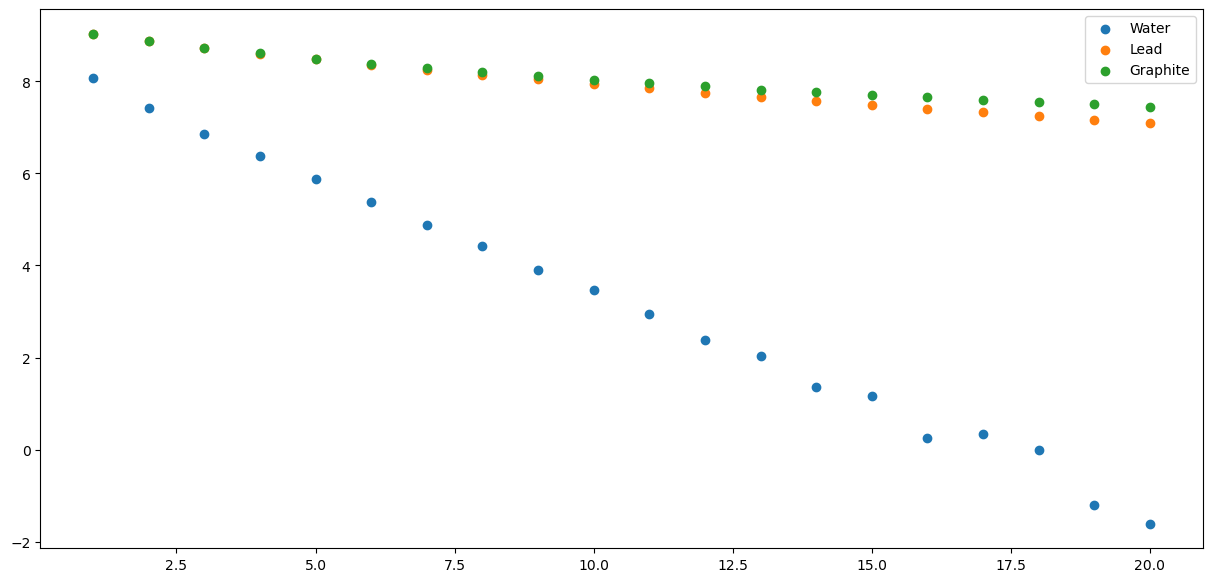

The characteristic attenuation length of water is 1.888 ± 0.009 cm
The characteristic attenuation length of lead is 9.546 ± 0.003 cm
The characteristic attenuation length of graphite is 11.729 ± 0.004 cm


In [697]:
def att_len(thickness, N_T, std_N_T):
    '''
    This function calculates the characteristic attenuation length from the parameters provided. 

    Parameters
    ----------
    thickness : list
        the array of the different thicknesses of the material.
    N_T: list
        the array of the number neutrons transmitted.
    std_N_T: list
        the array of the error in the number of neutrons transmitted.
    
  
    Returns
    -------
    list
        the attenuation length and the error in the attenuation length.
        
    '''
    
    #Any results that are equal to zero are removed so no errrors with np.polyfit occur.
    std_N_T = np.delete(std_N_T, np.argwhere(N_T==0))
    thickness = np.delete(thickness, np.argwhere(N_T==0))
    N_T = np.delete(N_T, np.argwhere(N_T==0))
    
    #Line is fitted for number of transmission against thickness, weighted by the error.
    coeff, covr = np.polyfit(thickness, np.log(N_T),1, cov=True, w=N_T/std_N_T)
    att_length = -1/coeff[0]
    err_att_length = np.sqrt(covr[0][0])
    return att_length, err_att_length

att_length_w, err_att_length_w = att_len(slab_thickness_arr, N_T_w_t, std_N_T_w_t)
att_length_l, err_att_length_l = att_len(slab_thickness_arr, N_T_l_t, std_N_T_l_t)
att_length_g, err_att_length_g = att_len(slab_thickness_arr, T_R_g_t, std_N_T_g_t)

plt.rcParams["figure.figsize"] = (15,7)
fig = plt.figure()
plt.scatter(slab_thickness_arr, np.log(np.delete(N_T_w_t, np.argwhere(N_T_w_t==0))), label='Water')
plt.scatter(slab_thickness_arr, np.log(np.delete(N_T_l_t, np.argwhere(N_T_l_t==0))), label='Lead')
plt.scatter(slab_thickness_arr, np.log(np.delete(N_T_g_t, np.argwhere(N_T_g_t==0))), label='Graphite')
plt.legend()
plt.show()

    
    
                                        
print(f'The characteristic attenuation length of water is{att_length_w: .3f} ±{err_att_length_w: .3f} cm')
print(f'The characteristic attenuation length of lead is{att_length_l: .3f} ±{err_att_length_l: .3f} cm')
print(f'The characteristic attenuation length of graphite is{att_length_g: .3f} ±{err_att_length_g: .3f} cm')






The attenuation length describes the distance into the material that the probability of a neutron not being absorbed has dropped by a certain amount. We would thus expect to have more transmitted neutrons for a material with a larger characteristic attenuation length than a material with a smaller one. This is in keeping with our previous results with water having the lowest number of transmitted neutrons and graphite having the largest. We can see that for water at larger thicknesses the results seems erroneous, this is due to the number of transmitted neutrons being very small at larger thicknesses. This results in water having a larger error than the other materials.

Below, the woodcock method is used to model the path of neutrons through a 20cm slab consisting of two different materials joined at the 10cm mark. Some functions are first defined to help keep track of particle positions more efficiently for this method.

In [698]:
def theta_calc(steps):
    '''
    This function produces values for theta descibred in spherical polar coordinates.

    Parameters
    ----------
    steps : integer
        the number of angles to be produced.
       

    Returns
    -------
    list
        the array of the the values of theta.
    '''
    
    theta = np.arccos(1 - 2* np.random.uniform(0, 1, steps))
    return theta

def phi_calc(steps):
    '''
    This function produces values for phi descibred in spherical polar coordinates.

    Parameters
    ----------
    steps : integer
        the number of angles to be produced.
       

    Returns
    -------
    list
        the array of the the values of phi.
    '''
    
    phi = np.random.uniform(0, 2*np.pi, steps)
    return phi

def spherical_coords_woodcock(r, theta, phi):
    '''
    This function produces isotropic vectors distributed over a spherical surface to be used in the woodcock
    method specifically

    Parameters
    ----------
    r : list
        the array of lengths of each position
    theta: list
        the array of the angle theta for each position
    phi: list
        the array of the angle phi for each position
       

    Returns
    -------
    list
        the x, y and z positions for each position.
    '''
    x = r * np.sin(theta)*np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return x, y, z

def Sigma_calc(cross_section, molar_mass, density):
    '''
    This function calculates cross section, which is used to determine the mean free path.

    Parameters
    ----------
    cross_section : float
        the cross section of the material
    molar_mass: float
        the molar mass of the material
    density: float
        the density of the material.
       

    Returns
    -------
    float
        the value of cross section for the material.
    '''
    Sigma = N_A*density*cross_section/molar_mass
    return Sigma

In [699]:
def woodcock(Sigma_a_1, Sigma_a_2, Sigma_s_1, Sigma_s_2, sample_size):
    '''
    This function uses the woodcock method to simulate the transmission of neutrons through a 20cm slab consisting
    of two seperate materials joined at the 10cm mark. It determines the major cross section and minor cross section 
    of the slab, determines whether the steps are fictitious or not, and produces an output of the number of neutrons 
    absorbed,transmitted and reflected with the rates and corresponding errors.

    Parameters
    ----------
    Sigma_a_1 : float
        The cross section corresponding to absorption of the material from 0-10cm
    Sigma_a_2: float
        the cross section corresponding to the absorption of the material from 10-20cm
    Sigma_s_1 : float
        The cross section corresponding to scattering of the material from 0-10cm
    Sigma_s_2: float
        the cross section corresponding to the scattering of the material from 10-20cm
    sample_size: integer
        the number of neutrons used in the simulation
       

    Returns
    -------
    list
        the average number of transmitted, reflected and absorbed neutrons along with their corresponding errors. As
        well as the rates for each category and their errors.
    '''
    
    #Calculate total Sigma and determine which one is the larger and smaller.
    Sigma_1 = Sigma_a_1 + Sigma_s_1
    Sigma_2 = Sigma_a_2 + Sigma_s_2
    Sigma_max = max(Sigma_1, Sigma_2)
    Sigma_min = min(Sigma_1, Sigma_2)
    
    #define number of iterations and initialise arrays
    n_iter = 10
    N_R = np.zeros(n_iter)
    N_T = np.zeros(n_iter)
    N_A = np.zeros(n_iter)
    
    #Determine the probability of a fictitious step.
    p_fictitious = Sigma_min/Sigma_max
    
    #Determine the total mean free step from the maximum cross section
    lambda_T = 1/Sigma_max
    
        
    
    #If the minor cross section is between 0-10cm then enter this block of code
    
    if Sigma_min == Sigma_1: 
        
        for i in range(n_iter): 
            
            #Initialise initial x positions, making sure that neutrons move along the positive x-axis.
            theta = np.zeros(sample_size)
            theta = np.where(theta == 0, np.pi / 2, theta)
            phi = np.zeros(sample_size)
            r = r_exp(lambda_T, sample_size)
            
            x_neutron = spherical_coords_woodcock(r_exp(lambda_T, sample_size),theta,phi)[0]
            
            reflected_tally = 0
            absorbed_tally = 0
            transmitted_tally = 0
        
    
            while len(x_neutron) > 0: 
                
                #Update reflected or transmitted tally if neutron outside material
                reflected_tally += np.count_nonzero(x_neutron < 0)
                transmitted_tally += np.count_nonzero(x_neutron > 20)

                
                
                #Determine probabilities of absorption for the minor and major cross section.
                p_a_minor = Sigma_a_1/Sigma_1
                p_a_major = Sigma_a_2/Sigma_2
                
                v_rand = np.random.uniform(0,1, len(x_neutron))
                
                    
                p_rand = np.random.uniform(0,1, len(x_neutron))
                
               
                #Indicies of neutrons absorbed in major cross section
                inds_abs_major = np.argwhere((x_neutron <= 20) & (x_neutron > 10) & (p_rand < p_a_major))
                
                #Indicies of neutrons absorbed in minor cross section, only those with a non-fictitious step are considered
                inds_abs_minor = np.argwhere((x_neutron > 0) & (x_neutron<= 10) & (v_rand < p_fictitious) & (p_rand < p_a_minor))
                
                #Indicies of neutrons outside the material
                inds_out =  np.argwhere((x_neutron < 0) | (x_neutron > 20))
                
                #Indicies of neutrons to be removed 
                inds_delete = np.concatenate((inds_abs_major, inds_abs_minor, inds_out))
                
                #Update absorbed tally for the neutrons that have been absorbed.
                absorbed_tally += np.count_nonzero(p_rand[inds_abs_major] < p_a_major)
                absorbed_tally += np.count_nonzero(p_rand[inds_abs_minor] < p_a_minor)
                
                #Remove neutrons that have been absorbed, reflected or transmitted and update positions accordingly
                x_neutron = np.delete(x_neutron, inds_delete)
                r = np.delete(r, inds_delete)
                theta = np.delete(theta, inds_delete)
                phi = np.delete(phi, inds_delete)
                v_rand = np.delete(v_rand, inds_delete)
                
                #Determine indicies of neutrons undergoing a fictitious or non-fictitious step, or those in the major cross section.
                indicies_fic = np.argwhere((x_neutron > 0) & (x_neutron <= 10) & (v_rand > p_fictitious))
                indicies_non_fic = np.argwhere((x_neutron > 0) &  (x_neutron <= 10) & (v_rand < p_fictitious))
                indicies_maj = np.argwhere((x_neutron <= 20) & (x_neutron > 10))
                
                #Update length of step for all neutrons
                r = r_exp(lambda_T, len(x_neutron))
                
                if(indicies_fic.size > 0):
                    #neutrons with a fictitious step only have the length of step changed when position updated
                    x_neutron[indicies_fic] += spherical_coords_woodcock(r[indicies_fic], theta[indicies_fic], phi[indicies_fic])[0]
                
                
                if(indicies_non_fic.size > 0):
                    #neutrons with a non-fictitious step are scattered in a random direction
                    theta[indicies_non_fic.flatten()] = theta_calc(len(indicies_non_fic))
                    phi[indicies_non_fic.flatten()] = phi_calc(len(indicies_non_fic))
                    x_neutron[indicies_non_fic] += spherical_coords_woodcock(r[indicies_non_fic], theta[indicies_non_fic], phi[indicies_non_fic])[0]
                if(indicies_maj.size > 0):  
                    #Neutrons in the major cross-section are scattered in a random direction
                    theta[indicies_maj.flatten()] = theta_calc(len(indicies_maj))
                    phi[indicies_maj.flatten()] = phi_calc(len(indicies_maj))
                    x_neutron[indicies_maj] += spherical_coords_woodcock(r[indicies_maj], theta[indicies_maj], phi[indicies_maj])[0]
            
            #The arrays are updated for each iteration
            N_R[i] = reflected_tally
            N_T[i] = transmitted_tally
            N_A[i] = absorbed_tally
            
    #Enters into this block of code if the minor cross section is between 10-20cm.
    else: 
        for i in range(n_iter): 
            theta = np.zeros(sample_size)
            theta = np.where(theta == 0, np.pi / 2, theta)
            phi = np.zeros(sample_size)
            r = r_exp(lambda_T, sample_size)
            
            x_neutron = spherical_coords_woodcock(r_exp(lambda_T, sample_size),theta,phi)[0]
            
            reflected_tally = 0
            absorbed_tally = 0
            transmitted_tally = 0
    
            while len(x_neutron) > 0: 
            
            
        
                reflected_tally += np.count_nonzero(x_neutron < 0)
                transmitted_tally += np.count_nonzero(x_neutron > 20)

               
                
            
                p_a_minor = Sigma_a_2/Sigma_2
                p_a_major = Sigma_a_1/Sigma_1
                
                v_rand = np.random.uniform(0,1, len(x_neutron))
                
                    
                p_rand = np.random.uniform(0,1, len(x_neutron))
               
               
                
                inds_abs_major = np.argwhere((x_neutron <= 10) & (x_neutron > 0) & (p_rand < p_a_major))
                
                inds_abs_minor = np.argwhere((x_neutron > 10) & (x_neutron<= 20) & (v_rand < p_fictitious) & (p_rand < p_a_minor))
                
                inds_out =  np.argwhere((x_neutron < 0) | (x_neutron > 20))
                
                inds_delete = np.concatenate((inds_abs_major, inds_abs_minor, inds_out))
                
                absorbed_tally += np.count_nonzero(p_rand[inds_abs_major] < p_a_major)
                absorbed_tally += np.count_nonzero(p_rand[inds_abs_minor] < p_a_minor)
                 
                x_neutron = np.delete(x_neutron, inds_delete)
                r = np.delete(r, inds_delete)
                theta = np.delete(theta, inds_delete)
                phi = np.delete(phi, inds_delete)
                v_rand = np.delete(v_rand, inds_delete)
                             
                indicies_fic = np.argwhere((x_neutron > 10) & (x_neutron <= 20) & (v_rand > p_fictitious))
                indicies_non_fic = np.argwhere((x_neutron > 10) &  (x_neutron <= 20) & (v_rand < p_fictitious))
                indicies_maj = np.argwhere((x_neutron <= 10) & (x_neutron > 0))
                                          
                r = r_exp(lambda_T, len(x_neutron))
                if(indicies_fic.size > 0):
                    x_neutron[indicies_fic] += spherical_coords_woodcock(r[indicies_fic], theta[indicies_fic], phi[indicies_fic])[0]
                
                
                if(indicies_non_fic.size > 0):
                    theta[indicies_non_fic.flatten()] = theta_calc(len(indicies_non_fic))
                    phi[indicies_non_fic.flatten()] = phi_calc(len(indicies_non_fic))
                    x_neutron[indicies_non_fic] += spherical_coords_woodcock(r[indicies_non_fic], theta[indicies_non_fic], phi[indicies_non_fic])[0]
                if(indicies_maj.size > 0):  
                    theta[indicies_maj.flatten()] = theta_calc(len(indicies_maj))
                    phi[indicies_maj.flatten()] = phi_calc(len(indicies_maj))
                    x_neutron[indicies_maj] += spherical_coords_woodcock(r[indicies_maj], theta[indicies_maj], phi[indicies_maj])[0]
                     
                                                  
                             
            N_R[i] = reflected_tally
            N_T[i] = transmitted_tally
            N_A[i] = absorbed_tally
    
    
    #Mean and error for each of the neutron tallys are calculated
    N_R_mean = np.mean(N_R)
    N_R_std = np.sqrt(N_R_mean)
    
    N_T_mean = np.mean(N_T)
    N_T_std = np.sqrt(N_T_mean)
    
    N_A_mean = np.mean(N_A)
    N_A_std = np.sqrt(N_A_mean)

    #corresponding rates are then calculated 
    reflection_rate = N_R_mean/sample_size
    reflection_rate_err = N_R_std/N_R_mean * reflection_rate


    transmission_rate = N_T_mean/sample_size
    transmission_rate_err = N_T_std/N_T_mean * transmission_rate

   

    absorption_rate = N_A_mean/sample_size
    absorption_rate_err = N_A_std/N_A_mean * absorption_rate
   
    
    return  N_R_mean, N_R_std, N_T_mean, N_T_std, N_A_mean, N_A_std, reflection_rate, reflection_rate_err, transmission_rate, transmission_rate_err, absorption_rate, absorption_rate_err    
                    
                    
                                       

The woodcock method is then used to simulate transmission of neutrons through 10cm of lead followed by 10cm of water, the results of the rates of transmission, reflection and absorption are then output below.

In [700]:
_, _, _, _, _, _, R_R_l_w, err_R_R_l_w, T_R_l_w, err_T_R_l_w, A_R_l_w, err_A_R_l_w = woodcock(Sigma_a_lead, Sigma_a_water, Sigma_s_lead, Sigma_s_water, 10000)

print('---------------------------------------------------------------------------------------------\n'
          f'Transmission through a 20cm slab consisting of of lead from 0-10cm and water from 10-20cm \n'
          '---------------------------------------------------------------------------------------------\n'
        f'Percent reflected = {R_R_l_w *100: .2f} ± {err_R_R_l_w * 100: .2f} %\n'
        f'Percent transmitted = {T_R_l_w* 100: .2f} ± {err_T_R_l_w * 100: .2f} % \n'
        f'Percent absorbed = {A_R_l_w * 100: .2f} ± {err_A_R_l_w * 100: .2f} % \n')

---------------------------------------------------------------------------------------------
Transmission through a 20cm slab consisting of of lead from 0-10cm and water from 10-20cm 
---------------------------------------------------------------------------------------------
Percent reflected =  73.62 ±  0.86 %
Percent transmitted =  0.18 ±  0.04 % 
Percent absorbed =  26.20 ±  0.51 % 



In [701]:
def woodcock_visualiser(Sigma_a_1, Sigma_a_2, Sigma_s_1, Sigma_s_2, visualise_size):
    '''
    This function visualises the woodcock method used above by plotting the path of different neutrons through the
    two materials. The materials are joined at 10cm.

    Parameters
    ----------
    Sigma_a_1 : float
        The cross section corresponding to absorption of the material from 0-10cm
    Sigma_a_2: float
        the cross section corresponding to the absorption of the material from 10-20cm
    Sigma_s_1 : float
        The cross section corresponding to scattering of the material from 0-10cm
    Sigma_s_2: float
        the cross section corresponding to the scattering of the material from 10-20cm
    visualise_size: integer
        the number of neutrons to be visualised
       

    Returns
    -------
    list
        
    '''
    
    Sigma_1 = Sigma_a_1 + Sigma_s_1
    Sigma_2 = Sigma_a_2 + Sigma_s_2
    Sigma_max = max(Sigma_1, Sigma_2)
    
    Sigma_min = min(Sigma_1, Sigma_2)

    
    p_fictitious = Sigma_min/Sigma_max
    
    lambda_T = 1/Sigma_max
    reflected_tally = 0
    absorbed_tally = 0
    transmitted_tally = 0
    
    if Sigma_min == Sigma_1: 
        
        for i in range(visualise_size): 
            theta = np.zeros(1)
            theta = np.where(theta == 0, np.pi / 2, theta)
            phi = np.zeros(1)
            r = r_exp(lambda_T, 1)
            
            #x position calculated as in woodcock method above, but y and z position are given a random coordinate 
            #This is to simulate neutrons entering parallel into the material along the positive x-axis.
            x_neutron = spherical_coords_woodcock(r_exp(lambda_T, 1),theta,phi)[0]
            y_neutron = np.random.uniform(-1, 1, 1)
            z_neutron = np.random.uniform(-1, 1, 1)
            
            #Initialise arrays to keep track of the coordinates of the neutron
            x_history = []
            y_history = []
            z_history = []
            
            
            
        
        
    
            while len(x_neutron) > 0: 
                
                
                #update history of positions
                x_history.append(x_neutron[0])
                y_history.append(y_neutron[0])
                z_history.append(z_neutron[0])
        
                reflected_tally += np.count_nonzero(x_neutron < 0)
                transmitted_tally += np.count_nonzero(x_neutron > 20)

                
                
            
                p_a_minor = Sigma_a_1/Sigma_1
                p_a_major = Sigma_a_2/Sigma_2
                
                v_rand = np.random.uniform(0,1, len(x_neutron))
                
                    
                p_rand = np.random.uniform(0,1, len(x_neutron))
               
               
                
                inds_abs_major = np.argwhere((x_neutron <= 20) & (x_neutron > 10) & (p_rand < p_a_major))
                
                inds_abs_minor = np.argwhere((x_neutron > 0) & (x_neutron<= 10) & (v_rand < p_fictitious) & (p_rand < p_a_minor))
                
                inds_out =  np.argwhere((x_neutron < 0) | (x_neutron > 20))
                
                inds_delete = np.concatenate((inds_abs_major, inds_abs_minor, inds_out))
                
                absorbed_tally += np.count_nonzero(p_rand[inds_abs_major] < p_a_major)
                absorbed_tally += np.count_nonzero(p_rand[inds_abs_minor] < p_a_minor)
                 
                x_neutron = np.delete(x_neutron, inds_delete)
                
                r = np.delete(r, inds_delete)
                theta = np.delete(theta, inds_delete)
                phi = np.delete(phi, inds_delete)
                v_rand = np.delete(v_rand, inds_delete)
                             
                indicies_fic = np.argwhere((x_neutron > 0) & (x_neutron <= 10) & (v_rand > p_fictitious))
                indicies_non_fic = np.argwhere((x_neutron > 0) &  (x_neutron <= 10) & (v_rand < p_fictitious))
                indicies_maj = np.argwhere((x_neutron <= 20) & (x_neutron > 10))
                                          
                r = r_exp(lambda_T, len(x_neutron))
                if(indicies_fic.size > 0):
                       #Updates the x,y and z coordinates according to the conditions of the fictitious step.
                    x_neutron[indicies_fic] += spherical_coords_woodcock(r[indicies_fic], theta[indicies_fic], phi[indicies_fic])[0]
                    y_neutron[indicies_fic] += spherical_coords_woodcock(r[indicies_fic], theta[indicies_fic], phi[indicies_fic])[1]
                    z_neutron[indicies_fic] += spherical_coords_woodcock(r[indicies_fic], theta[indicies_fic], phi[indicies_fic])[2]
                
                if(indicies_non_fic.size > 0):
                    
                    #updates x, y and z coordinates according to the conditions of the non-fictitious step.
                    theta[indicies_non_fic.flatten()] = theta_calc(len(indicies_non_fic))
                    phi[indicies_non_fic.flatten()] = phi_calc(len(indicies_non_fic))
                    x_neutron[indicies_non_fic] += spherical_coords_woodcock(r[indicies_non_fic], theta[indicies_non_fic], phi[indicies_non_fic])[0]
                    y_neutron[indicies_non_fic] += spherical_coords_woodcock(r[indicies_non_fic], theta[indicies_non_fic], phi[indicies_non_fic])[1]
                    z_neutron[indicies_non_fic] += spherical_coords_woodcock(r[indicies_non_fic], theta[indicies_non_fic], phi[indicies_non_fic])[2]
                if(indicies_maj.size > 0):  
                    #updates x,y and z coordinates according to the conditions of a step in the major cross section
                    theta[indicies_maj.flatten()] = theta_calc(len(indicies_maj))
                    phi[indicies_maj.flatten()] = phi_calc(len(indicies_maj))
                    x_neutron[indicies_maj] += spherical_coords_woodcock(r[indicies_maj], theta[indicies_maj], phi[indicies_maj])[0]
                    y_neutron[indicies_maj] += spherical_coords_woodcock(r[indicies_maj], theta[indicies_maj], phi[indicies_maj])[1]
                    z_neutron[indicies_maj] += spherical_coords_woodcock(r[indicies_maj], theta[indicies_maj], phi[indicies_maj])[2]
            
            #Plot the x, y and z coordinate of the neutron with a colormap.
            ax.scatter(x_history, y_history, z_history, cmap='viridis', c=x_history, vmin = 0 , vmax = 20)
            ax.plot(x_history, y_history, z_history, alpha= 0.8, label = f'neutron {i}')  
            
    else: 
        for i in range(visualise_size): 
            theta = np.zeros(1)
            theta = np.where(theta == 0, np.pi / 2, theta)
            phi = np.zeros(1)
            r = r_exp(lambda_T, 1)
            x_neutron, y_neutron, z_neutron = spherical_coords_woodcock(r_exp(lambda_T, 1),theta,phi)
            
            x_history = []
            y_history = []
            z_history = []
            
            
        
        
    
            while len(x_neutron) > 0: 
                #update history of positions
                
                x_history.append(x_neutron[0])
                y_history.append(y_neutron[0])
                z_history.append(z_neutron[0])
                
        
                reflected_tally += np.count_nonzero(x_neutron < 0)
                transmitted_tally += np.count_nonzero(x_neutron > 20)

               
                
            
                p_a_minor = Sigma_a_2/Sigma_2
                p_a_major = Sigma_a_1/Sigma_1
                
                v_rand = np.random.uniform(0,1, len(x_neutron))
                
                    
                p_rand = np.random.uniform(0,1, len(x_neutron))
                
               
                
                inds_abs_major = np.argwhere((x_neutron <= 10) & (x_neutron > 0) & (p_rand < p_a_major))
                
                inds_abs_minor = np.argwhere((x_neutron > 10) & (x_neutron<= 20) & (v_rand < p_fictitious) & (p_rand < p_a_minor))
                
                inds_out =  np.argwhere((x_neutron < 0) | (x_neutron > 20))
                
                inds_delete = np.concatenate((inds_abs_major, inds_abs_minor, inds_out))
                
                absorbed_tally += np.count_nonzero(p_rand[inds_abs_major] < p_a_major)
                absorbed_tally += np.count_nonzero(p_rand[inds_abs_minor] < p_a_minor)
                 
                x_neutron = np.delete(x_neutron, inds_delete)
                r = np.delete(r, inds_delete)
                theta = np.delete(theta, inds_delete)
                phi = np.delete(phi, inds_delete)
                v_rand = np.delete(v_rand, inds_delete)
                             
                indicies_fic = np.argwhere((x_neutron > 10) & (x_neutron <= 20) & (v_rand > p_fictitious))
                indicies_non_fic = np.argwhere((x_neutron > 10) &  (x_neutron <= 20) & (v_rand < p_fictitious))
                indicies_maj = np.argwhere((x_neutron <= 10) & (x_neutron > 0))
                                          
                r = r_exp(lambda_T, len(x_neutron))
                if(indicies_fic.size > 0):
                    x_neutron[indicies_fic] += spherical_coords_woodcock(r[indicies_fic], theta[indicies_fic], phi[indicies_fic])[0]
                    y_neutron[indicies_fic] += spherical_coords_woodcock(r[indicies_fic], theta[indicies_fic], phi[indicies_fic])[1]
                    z_neutron[indicies_fic] += spherical_coords_woodcock(r[indicies_fic], theta[indicies_fic], phi[indicies_fic])[2]
                
                if(indicies_non_fic.size > 0):
                    theta[indicies_non_fic.flatten()] = theta_calc(len(indicies_non_fic))
                    phi[indicies_non_fic.flatten()] = phi_calc(len(indicies_non_fic))
                    x_neutron[indicies_non_fic] += spherical_coords_woodcock(r[indicies_non_fic], theta[indicies_non_fic], phi[indicies_non_fic])[0]
                    y_neutron[indicies_non_fic] += spherical_coords_woodcock(r[indicies_non_fic], theta[indicies_non_fic], phi[indicies_non_fic])[1]
                    z_neutron[indicies_non_fic] += spherical_coords_woodcock(r[indicies_non_fic], theta[indicies_non_fic], phi[indicies_non_fic])[2]
                    
                if(indicies_maj.size > 0):  
                    theta[indicies_maj.flatten()] = theta_calc(len(indicies_maj))
                    phi[indicies_maj.flatten()] = phi_calc(len(indicies_maj))
                    x_neutron[indicies_maj] += spherical_coords_woodcock(r[indicies_maj], theta[indicies_maj], phi[indicies_maj])[0]
                    y_neutron[indicies_maj] += spherical_coords_woodcock(r[indicies_maj], theta[indicies_maj], phi[indicies_maj])[1]
                    z_neutron[indicies_maj] += spherical_coords_woodcock(r[indicies_maj], theta[indicies_maj], phi[indicies_maj])[2]
                                             
        ax.scatter(x_history, y_history, z_history, cmap='viridis', c=x_history, vmin = 0 , vmax = 20)
        ax.plot(x_history, y_history, z_history, alpha= 0.8, label = f'neutron {i}')
        
    #add a colorbar to the axis of the plot
    p = ax.scatter(x_history, y_history, z_history, cmap='viridis', c=x_history, vmin = 0, vmax = 20)
        
    fig.colorbar(p, fraction=0.046, pad=0.04)

                                       

    ax.set_xlim(0, 20)
    ax.legend()
    plt.show()                 

   
    
    return  
                    

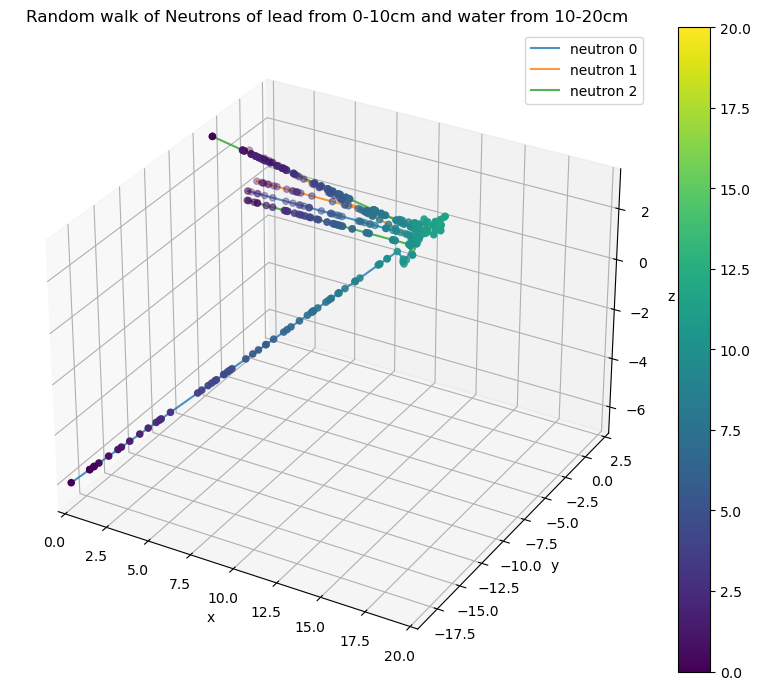

In [702]:
plt.rcParams["figure.figsize"] = (7,8)

fig = plt.figure()
ax = Axes3D(fig)
ax.set_title('Random walk of Neutrons of lead from 0-10cm and water from 10-20cm ')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

woodcock_visualiser(Sigma_a_lead, Sigma_a_water, Sigma_a_lead, Sigma_s_water, 3)


From the plot of lead followed by water for the 20cm slab, we can see the minor cross section of lead contains the fictitious steps, where the particle continues along its path. When entering into water at the 10cm mark, the particle scatters in random directions in the major cross section. This is consistent from what we would expect from the Woodcock method.

From our results, it can be shown that the Monte Carlo method is an accurate method for simulation of a neutrons path through different materials. It produces results in line with what is expected from the physical values of the different materials. It can also be seen that the Woodcock method can be used to simulate more complicated situations by further expanding on the Monte Carlo method by seperating the material into a major and minor cross section and using a fictitious and non-ficitious step in the minor cross section.